# **PROJECT NAME-**
## **Iris Flowers Classification ML Project**

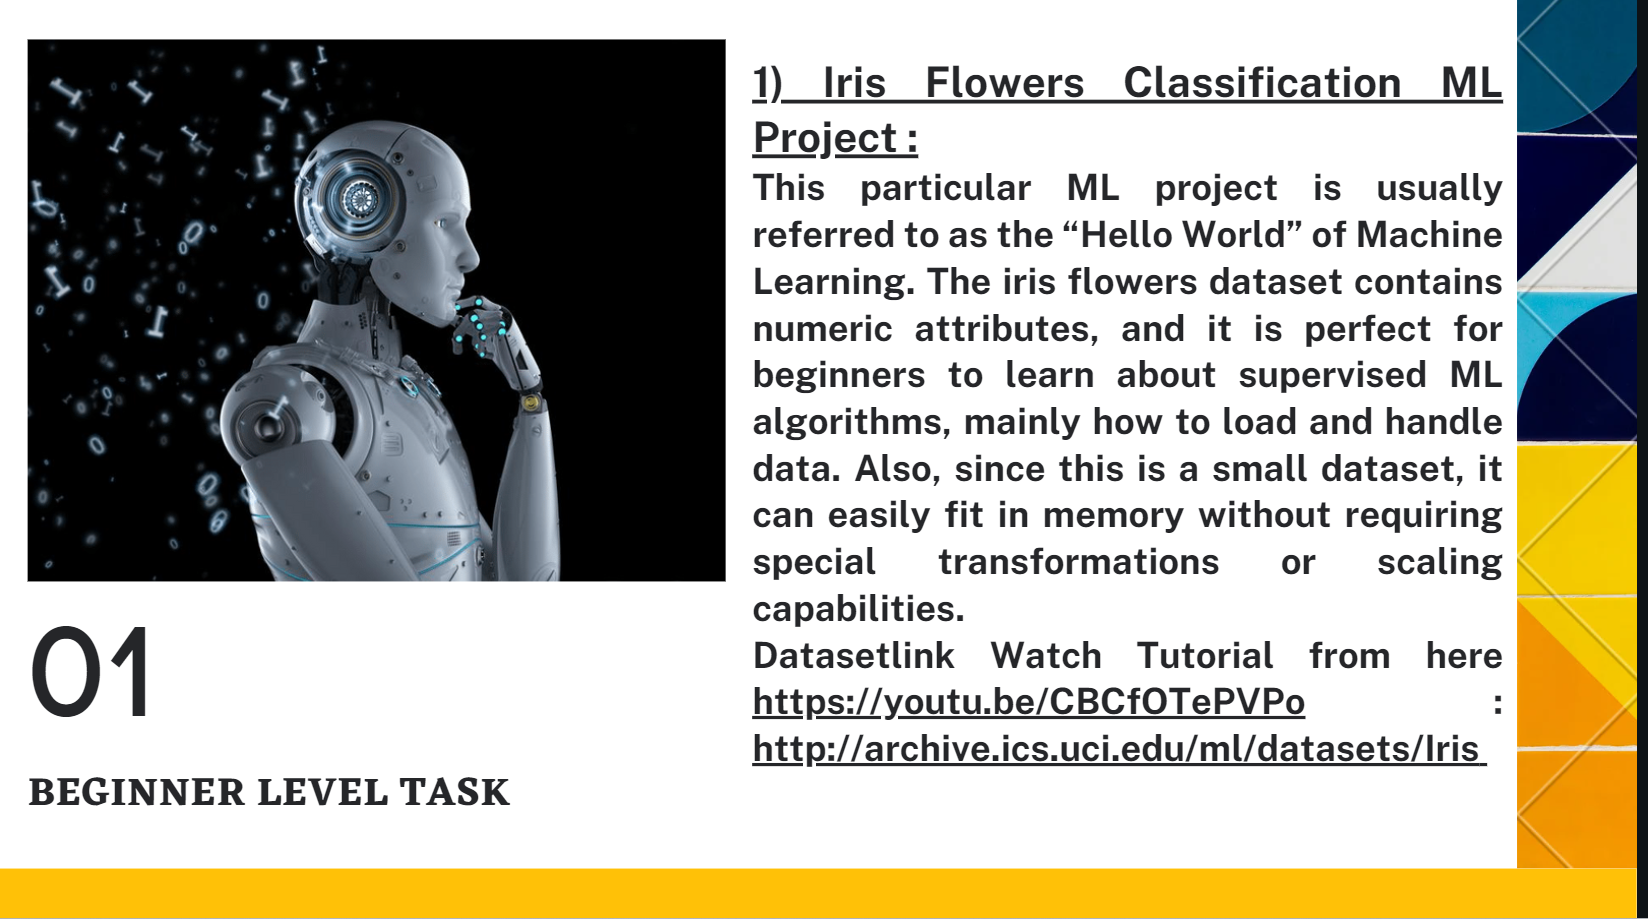

Batch - **March2023**

Author : **Alok Singh**

Task 1 : **Iris Flowers Classification ML Project**

Level : **Beginner level task**

Language :**Python**

IDE : **google colab**

Github Link : https://github.com/aloksingh43/LGMVIP-DataScience

## **Importing important libraries**

In [ ]:
# Let's import some important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset= load_iris()

In [ ]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df=pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

In [ ]:
df['Target']=dataset.target

**Dataset First View**

In [ ]:
# check top five rows to get the overview of data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# check bottom four rows to get the overview of data
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
# shape tell us rows and columns
print('Shape of data is:' ,df.shape)

Shape of data is: (150, 5)


### Dataset Information

In [ ]:
# Let's take information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
# check description about dataset
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### Null Values

In [ ]:
null_values_in_data=df.isnull().sum().sort_values(ascending=False)
print(null_values_in_data)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64


### **Duplicate Values**

In [ ]:
# let's check duplicate values in our dataset
len(df[df.duplicated()])

1

We get one duplicate value let's drop it 

In [ ]:
df.drop_duplicates(inplace=True)

# **EDA**

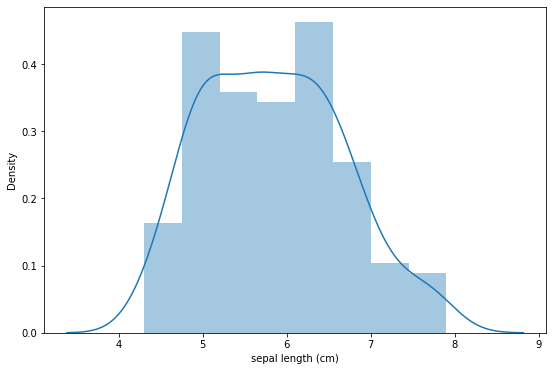

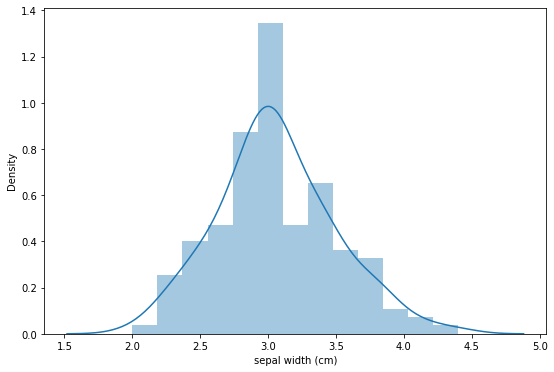

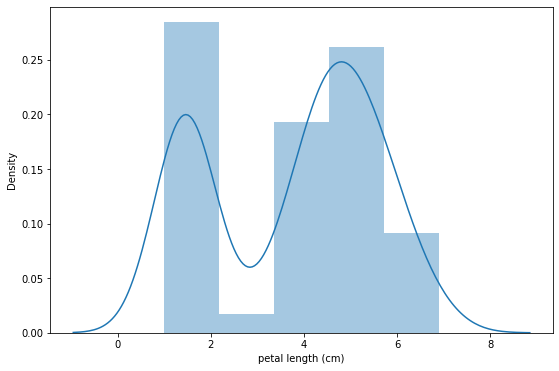

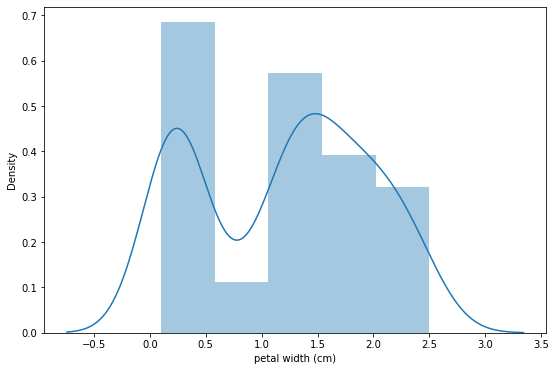

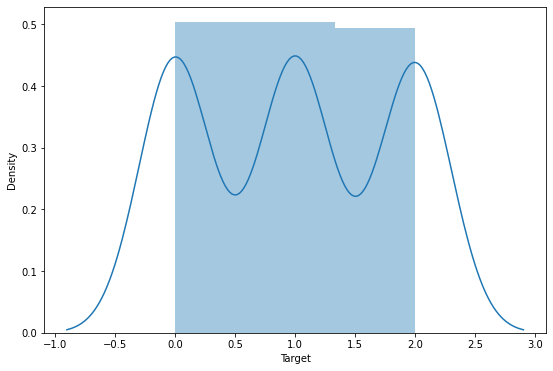

In [ ]:
# Distribution of numerical features
for col in df[:]:
  if col=="Rented Bike Count":
      pass
  else:
    fig = plt.figure(figsize=(9, 6))
    sns.distplot(df[col]);

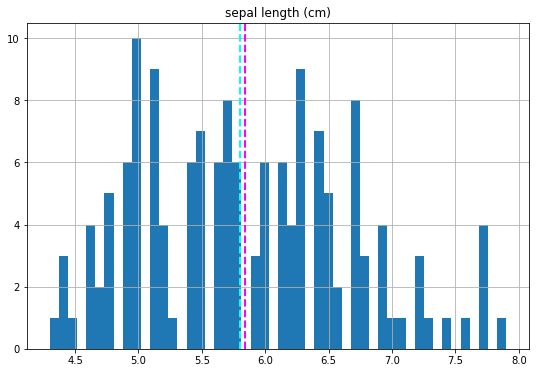

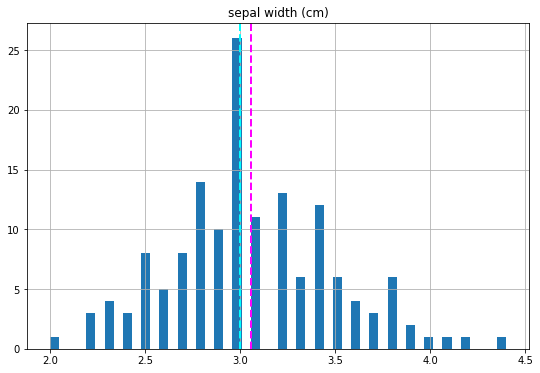

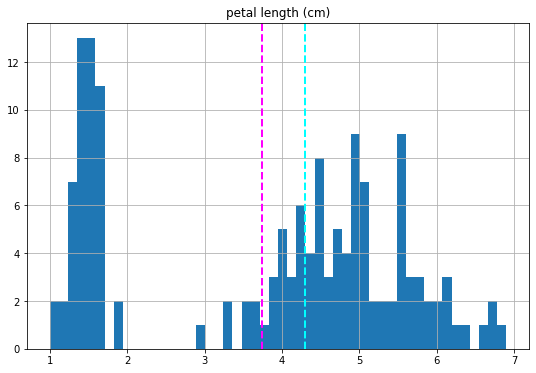

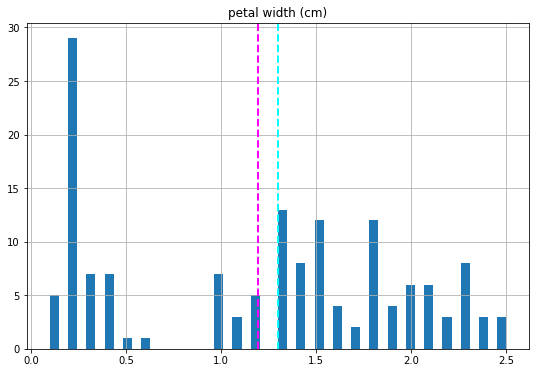

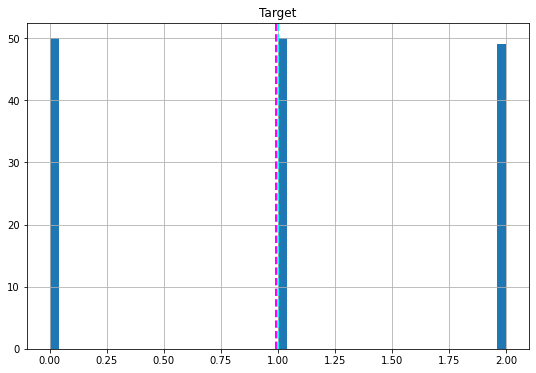

In [ ]:
# distribution about mean and median
for col in df[:]:
  if col=='Rented Bike Count':
    pass
  else:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

# **CHECK OUTLIERS**

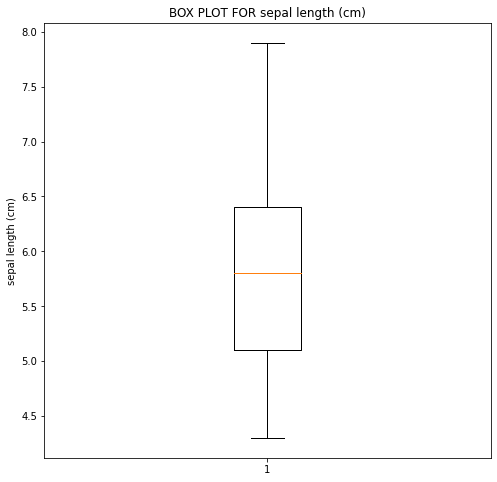

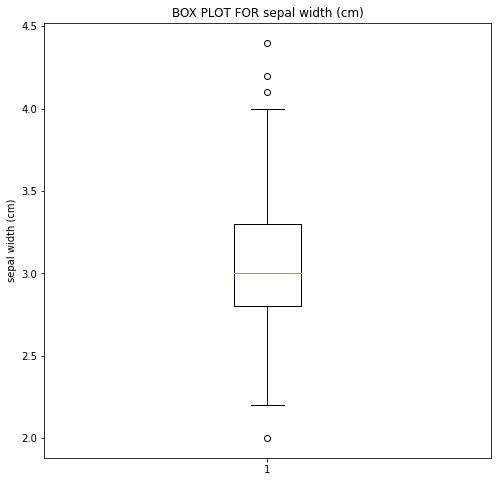

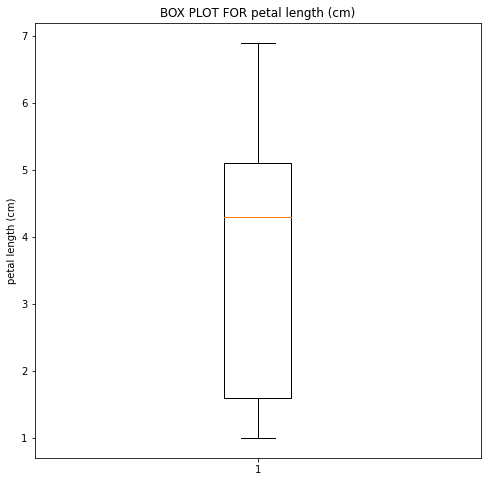

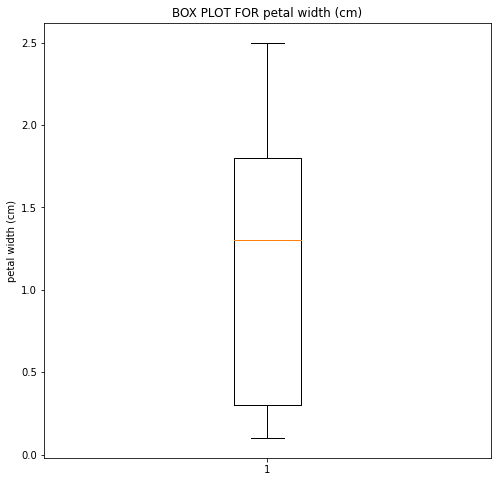

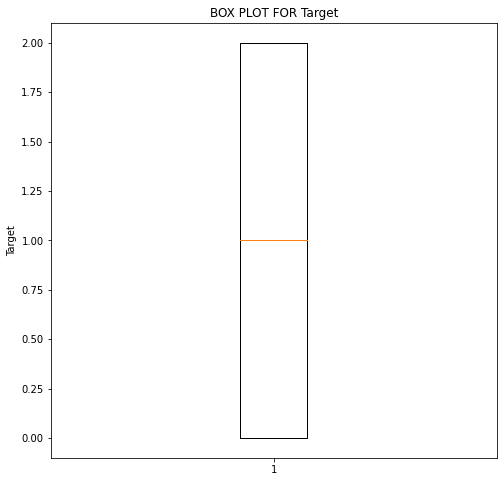

In [ ]:
# Box plot for numeric features
for col in df[:]:
         plt.figure(figsize=(8,8))
         plt.boxplot(df[col])
         plt.ylabel(col)
         plt.title(f'BOX PLOT FOR {col}');

In above box plot we see some outliers in 'sepal width (cm)' column

# **Let's remove outliers**

In [ ]:
q1=df['sepal width (cm)'].quantile(0.25)
q3=df['sepal width (cm)'].quantile(0.75)
print(q1)
print(q3)

2.8
3.3


In [ ]:
IQR=q3-q1
Lower_Whisker = q1-1.5*IQR
Upper_Whisker = q3+1.5*IQR
print(Lower_Whisker)
print(Upper_Whisker)

2.05
4.05


In [ ]:
df=df[df['sepal width (cm)']>Lower_Whisker]
df=df[df['sepal width (cm)']<Upper_Whisker]

In [ ]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Target'],
      dtype='object')

# **Plot pair plot**

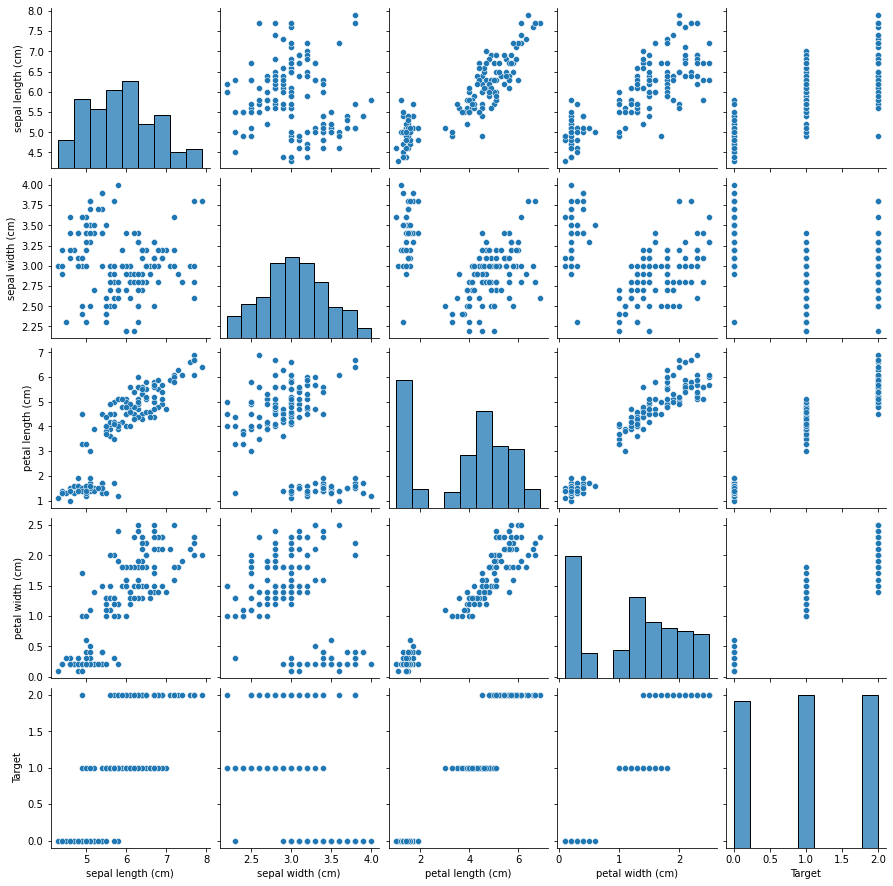

In [ ]:
#ploting pairplot for more info
sns.pairplot(df);

# **correlation**

In [ ]:
# now check correlation
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
sepal length (cm),1.000000,-0.123866,0.881381,0.825321,0.792591
sepal width (cm),-0.123866,1.000000,-0.403554,-0.337080,-0.401283
petal length (cm),0.881381,-0.403554,1.000000,0.961776,0.947849
petal width (cm),0.825321,-0.337080,0.961776,1.000000,0.955615
Target,0.792591,-0.401283,0.947849,0.955615,1.000000


### Let's  plot  correlation plot which tell us correlation between every feature 

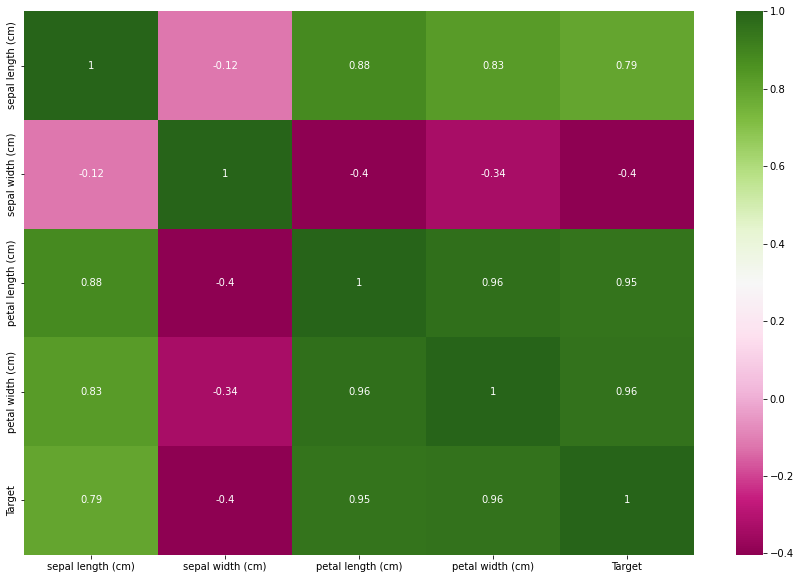

In [ ]:
# correlation plot
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='PiYG',annot=True);

Here we see 'petal length (cm)', 'petal width (cm)' are highly correlate 

we change it into  'petal area (cm^2)'

In [ ]:
df['petal area (cm^2)']= df['petal length (cm)']*df['petal width (cm)']

In [ ]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Target', 'petal area (cm^2)'],
      dtype='object')

In [ ]:
df=df.drop(['petal width (cm)','petal length (cm)'] , axis=1)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),Target,petal area (cm^2)
0,5.1,3.5,0,0.28
1,4.9,3.0,0,0.28
2,4.7,3.2,0,0.26
3,4.6,3.1,0,0.30
4,5.0,3.6,0,0.28


---
# **Split Variable**
---

X = Independent Variable

y = Dependent Variable

In [ ]:
X= df.drop(columns=['Target'])
y=df['Target']

---
# **Train Test Split**
---

Splitting Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 

# **Logistic Regression**

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
pred_test = lr.predict(X_test)

In [ ]:
clf_report= classification_report(y_test, pred_test)

In [ ]:
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      0.78      0.82         9
           2       0.80      0.89      0.84         9

    accuracy                           0.90        29
   macro avg       0.89      0.89      0.89        29
weighted avg       0.90      0.90      0.90        29



In [ ]:
print(f"Accuracy Score: {accuracy_score(y_test, pred_test) * 100:.2f}%")

Accuracy Score: 89.66%
